## Experiment 3 ML Model with new feature

In [1]:
from action.core import load_action
from preprocessor.features import *
from sampling.bootstrap import bootstrap632
from sklearn import preprocessing
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
import json
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
PATH = "data/actions/"
X = []
y = []
gameids = ["0021500149", "0021500197", "0021500270", "0021500316",
           "0021500350", "0021500428", "0021500476", "0021500582"]


In [3]:
_0021500149 = json.load(open(PATH + gameids[0] + ".json"))
_0021500197 = json.load(open(PATH + gameids[1] + ".json"))
_0021500270 = json.load(open(PATH + gameids[2] + ".json"))
_0021500316 = json.load(open(PATH + gameids[3] + ".json"))
_0021500350 = json.load(open(PATH + gameids[4] + ".json"))
_0021500428 = json.load(open(PATH + gameids[5] + ".json"))
_0021500476 = json.load(open(PATH + gameids[6] + ".json"))
_0021500582 = json.load(open(PATH + gameids[7] + ".json")) 

In [4]:
ekeys = [_0021500149, _0021500197, _0021500270, _0021500316, _0021500350, _0021500428, _0021500476, _0021500582]

In [5]:
dtw = []
dist = []
canon = []
entp = []
tcanon = []
pdist = []
speed = []

print "LOADING ACTIONS..."
for ekey in ekeys:
    for eid in sorted(ekey.keys()):
        try:
            gid = ekey[eid]['gameid']
            action = load_action(gid, eid)
            # _dtw  = get_DTW(action)
            _dist = get_mean_distance(action)
            _canon = get_mean_distance_from_cannonical_position(action)
            _entp = get_entropy(action)
            _tcanon = get_time_defending(action)
            _pdist = get_distance_from_post(action)
            _speed = get_average_speed(action)
            # dtw.append(_dtw)
            canon.append(_canon)
            dist.append(_dist)
            entp.append(_entp)
            tcanon.append(_tcanon)
            pdist.append(_pdist)
            speed.append(_speed)
            # X.append(_dtw + _entp)
            y.append(int(action.label))
        except Exception:
            print gid + " | " + str(eid)
y = np.array(y)

LOADING ACTIONS...
0021500149 | 434
0021500350 | 393
0021500350 | 417
0021500350 | 485
0021500350 | 520
0021500350 | 523
0021500428 | 428
0021500428 | 441
0021500428 | 502
0021500476 | 346
0021500476 | 86
0021500582 | 113
0021500582 | 139
0021500582 | 364
0021500582 | 407
0021500582 | 503


In [6]:
# zone_dtw = [dtw[index] for index, value in enumerate(y) if value == -1]
# man_dtw = [dtw[index] for index, value in enumerate(y) if value == 1]

zone_canon = [canon[index] for index, value in enumerate(y) if value == -1]
man_canon = [canon[index] for index, value in enumerate(y) if value == 1]

zone_dist = [dist[index] for index, value in enumerate(y) if value == -1]
man_dist = [dist[index] for index, value in enumerate(y) if value == 1]

zone_entp = [entp[index] for index, value in enumerate(y) if value == -1]
man_entp = [entp[index] for index, value in enumerate(y) if value == 1]

zone_tcanon = [tcanon[index] for index, value in enumerate(y) if value == -1]
man_tcanon = [tcanon[index] for index, value in enumerate(y) if value == 1]

zone_pdist = [pdist[index] for index, value in enumerate(y) if value == -1]
man_pdist = [pdist[index] for index, value in enumerate(y) if value == 1]

zone_speed = [speed[index] for index, value in enumerate(y) if value == -1]
man_speed = [speed[index] for index, value in enumerate(y) if value == 1]

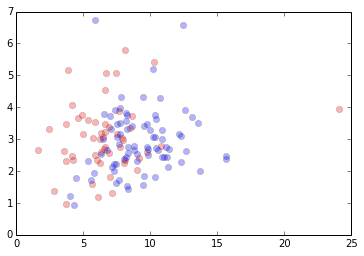

In [9]:
plt.plot(np.mean(zone_pdist, axis=1), np.mean(zone_tcanon, axis=1), 'ro', alpha=0.3)
plt.plot(np.mean(man_pdist, axis=1), np.mean(man_tcanon, axis=1), 'bo', alpha=0.3)
plt.show()

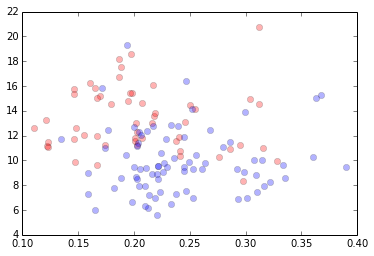

In [14]:
plt.plot(np.mean(zone_speed, axis=1), np.mean(zone_dist, axis=1), 'ro', alpha=0.3)
plt.plot(np.mean(man_speed, axis=1), np.mean(man_dist, axis=1), 'bo', alpha=0.3)
plt.show()

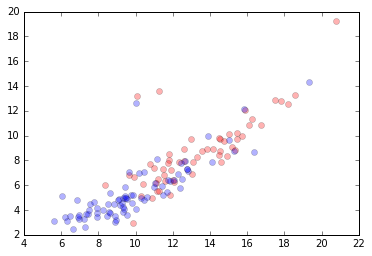

In [13]:
plt.plot(np.mean(zone_dist, axis=1), np.mean(zone_canon, axis=1), 'ro', alpha=0.3)
plt.plot(np.mean(man_dist, axis=1), np.mean(man_canon, axis=1), 'bo', alpha=0.3)
plt.show()

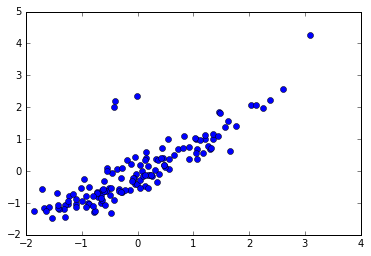

In [14]:
# X = np.matrix(preprocessing.scale(zip(np.mean(dist, axis=1), np.median(canon, axis=1))))
X = np.matrix(preprocessing.scale(zip(np.mean(dist, axis=1), np.mean(canon, axis=1), np.mean(tcanon, axis=1), np.mean(pdist, axis=1))))
plt.plot(np.array(X.T[0])[0], np.array(X.T[1])[0], 'o')

In [9]:
X = []
for index in range(len(dist)):
    X.append([np.mean(dist[index]), np.mean(canon[index])])
X = np.matrix(X)

In [16]:
print "SPLITTING DATA..."
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)
# X_train, X_test, y_train, y_test = bootstrap632(X, y)
# """
print "BUILDING MODEL..."
clf = SVC()  # (class_weight='balanced')
clf.fit(X_train, y_train)
# """

"""
from sklearn.neighbors import KNeighborsClassifier as KNN
clf = KNN(n_neighbors=3)
clf.fit(X_train, y_train)
"""

y_pred = [clf.predict(x)[0] for x in X_test]

y_train_pred = [clf.predict(x) for x in X_train]

print "SHOWING METRICS FOR TRAINING..."
cf_train = confusion_matrix(y_train, y_train_pred, labels=[-1, 1])
print cf_train

# Thus in binary classification, the count of 
# true negatives is C_{0,0}
# false negatives is C_{1,0}
# true positives is C_{1,1}
# false positives is C_{0,1}

TN = cf_train[0][0] * 1.0
FN = cf_train[1][0] * 1.0
TP = cf_train[1][1] * 1.0
FP = cf_train[0][1] * 1.0
P = (TP + FN) * 1.0
N = (TN + FP) * 1.0

sensitivity = TP / P
specificity = TN / N

accuracy = (sensitivity * (P / (P + N))) + (specificity * (N / (P + N)))

print "sensitivity: " + str(round(sensitivity, 5))
print "specificity: " + str(round(specificity, 5))
print "   accuracy: " + str(round(accuracy, 5))

print "SHOWING METRICS FOR TESTING..."
cf_test = confusion_matrix(y_test, y_pred, labels=[-1, 1])
print cf_test

# Thus in binary classification, the count of 
# true negatives is C_{0,0}
# false negatives is C_{1,0}
# true positives is C_{1,1}
# false positives is C_{0,1}

TN = cf_test[0][0] * 1.0
FN = cf_test[1][0] * 1.0
TP = cf_test[1][1] * 1.0
FP = cf_test[0][1] * 1.0
P = (TP + FN) * 1.0
N = (TN + FP) * 1.0

sensitivity = TP / P
specificity = TN / N

accuracy = (sensitivity * (P / (P + N))) + (specificity * (N / (P + N)))

print "sensitivity: " + str(round(sensitivity, 5))
print "specificity: " + str(round(specificity, 5))
print "   accuracy: " + str(round(accuracy, 5))

SPLITTING DATA...
BUILDING MODEL...
SHOWING METRICS FOR TRAINING...
[[36  4]
 [ 2 53]]
sensitivity: 0.96364
specificity: 0.9
   accuracy: 0.93684
SHOWING METRICS FOR TESTING...
[[13  4]
 [ 2 22]]
sensitivity: 0.91667
specificity: 0.76471
   accuracy: 0.85366


In [33]:
k = 10
acc_train = []
acc_test = []
for i in range(k):
    # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)
    X_train, X_test, y_train, y_test = bootstrap632(X, y)
    # """
    clf = SVC()  # (class_weight='balanced')
    clf.fit(X_train, y_train)
    # """

    y_pred = [clf.predict(x)[0] for x in X_test]

    y_train_pred = [clf.predict(x) for x in X_train]

    cf_train = confusion_matrix(y_train, y_train_pred, labels=[-1, 1])

    TN = cf_train[0][0] * 1.0
    FN = cf_train[1][0] * 1.0
    TP = cf_train[1][1] * 1.0
    FP = cf_train[0][1] * 1.0
    P = (TP + FN) * 1.0
    N = (TN + FP) * 1.0

    sensitivity_train = TP / P
    specificity_train = TN / N

    accuracy_train = (sensitivity_train * (P / (P + N))) + (specificity_train * (N / (P + N)))

    cf_test = confusion_matrix(y_test, y_pred, labels=[-1, 1])
    print cf_test
    TN = cf_test[0][0] * 1.0
    FN = cf_test[1][0] * 1.0
    TP = cf_test[1][1] * 1.0
    FP = cf_test[0][1] * 1.0
    P = (TP + FN) * 1.0
    N = (TN + FP) * 1.0

    sensitivity_test = TP / P
    specificity_test = TN / N

    accuracy_test = (sensitivity_test * (P / (P + N))) + (specificity_test * (N / (P + N)))
    acc_train.append(accuracy_train)
    acc_test.append(accuracy_test)

    print "sensitivity test: " + str(round(sensitivity_test, 5))
    print "specificity test: " + str(round(specificity_test, 5))
    print "   accuracy test: " + str(round(accuracy_test, 5))
    print ""
    
import numpy as np
acc_m = (0.632 * np.mean(acc_test)) + (0.368 * np.mean(acc_train))
print "Accuracy of the model: " + str(acc_m)

[[13  5]
 [ 6 30]]
sensitivity test: 0.83333
specificity test: 0.72222
   accuracy test: 0.7963

[[16  3]
 [ 4 26]]
sensitivity test: 0.86667
specificity test: 0.84211
   accuracy test: 0.85714

[[15  4]
 [ 1 28]]
sensitivity test: 0.96552
specificity test: 0.78947
   accuracy test: 0.89583

[[21  1]
 [ 4 24]]
sensitivity test: 0.85714
specificity test: 0.95455
   accuracy test: 0.9

[[19  5]
 [ 2 34]]
sensitivity test: 0.94444
specificity test: 0.79167
   accuracy test: 0.88333

[[17  2]
 [ 8 24]]
sensitivity test: 0.75
specificity test: 0.89474
   accuracy test: 0.80392

[[20  4]
 [ 2 25]]
sensitivity test: 0.92593
specificity test: 0.83333
   accuracy test: 0.88235

[[23  3]
 [ 2 24]]
sensitivity test: 0.92308
specificity test: 0.88462
   accuracy test: 0.90385

[[16  5]
 [ 4 25]]
sensitivity test: 0.86207
specificity test: 0.7619
   accuracy test: 0.82

[[14  9]
 [ 3 26]]
sensitivity test: 0.89655
specificity test: 0.6087
   accuracy test: 0.76923

Accuracy of the model: 0.88402235